<a href="https://colab.research.google.com/github/nadyasyahrita/Detecting-Hate-Speech/blob/main/Detecting_Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [214]:
df_tweet=pd.read_csv('https://raw.githubusercontent.com/ialfina/id-hatespeech-detection/master/IDHSD_RIO_unbalanced_713_2017.txt', sep='\t', encoding = "ISO-8859-1", dtype=str)
df_tweet.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [215]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [216]:
# Set Training and Testing Data (70:30)
X_train, X_test, y_train, y_test  = train_test_split(df_tweet['Tweet'] , df_tweet['Label'], shuffle = True, test_size=0.25, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(534,)
(179,)
(534,)
(179,)


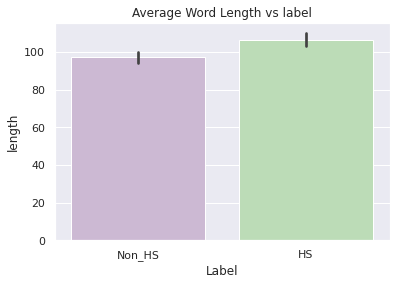

In [217]:
#Exploratory Data Analysis
df_tweet['length'] = df_tweet['Tweet'].apply(len)
fig1 = sns.barplot('Label','length',data = df_tweet,palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')
plt.show()

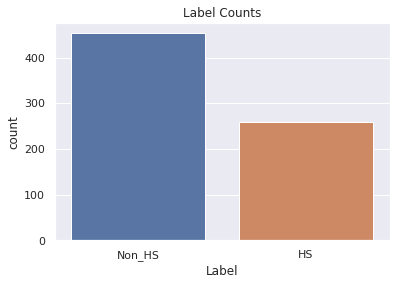

In [218]:
#bar graph to count positive negative label
fig2 = sns.countplot(x= 'Label',data = df_tweet)
plt.title('Label Counts')
plot = fig2.get_figure()
plt.show()

**Processing the tweets**

In [219]:
! pip install Sastrawi

In [220]:
df_tweet_set_NonHS = df_tweet.loc[df_tweet['Label'] == 'Non_HS']
df_tweet_set_NonHS = df_tweet_set_NonHS.head(259)
df_tweet_set_HS = df_tweet.loc[df_tweet['Label'] == 'HS']
df_tweet_set_HS = df_tweet_set_HS.head(259)
df_tweetnew = df_tweet_set_NonHS.append(df_tweet_set_HS, ignore_index=True)
df_tweetnew

,Label,Tweet,length
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79
...,...,...,...
513,HS,Gimana dgn Sumber waras.. Trans Jakarta ko jok...,102
514,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62
515,HS,"Betul bang hancurkan merka bang, musnahkan chi...",107
516,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139


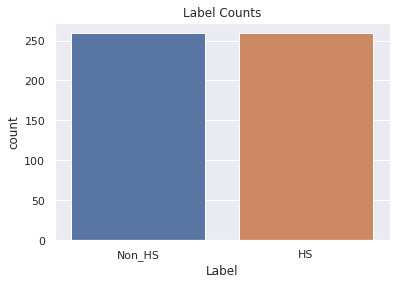

In [221]:
#bar graph to count positive negative label
fig2 = sns.countplot(x= 'Label',data = df_tweetnew)
plt.title('Label Counts')
plot = fig2.get_figure()
plt.show()

In [222]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [223]:
train=df_tweet
train['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in train['Tweet']]

In [224]:
train['text_lem']

0      RT  spardaxyz  Fadli Zon Minta Mendagri Segera...
1      RT  baguscondromowo  Mereka terus melukai aksi...
2      Sylvi  bagaimana gurbernur melakukan kekerasan...
3      Ahmad Dhani Tak Puas Debat Pilkada  Masalah Ja...
4      RT  lisdaulay    Waspada KTP palsu     kawal P...
                             ...                        
708    Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai  ...
709    Betul bang hancurkan merka bang  musnahkan chi...
710    Sapa Yg bilang Ahok anti korupsi    klo grombo...
711    Gw juga ngimpi SENTILIN BIJI BABI AHOK  pcetar...
712    Mudah an gw ketemu sama SI BABI IWAN BOPENG DI...
Name: text_lem, Length: 713, dtype: object

Non Hate speech


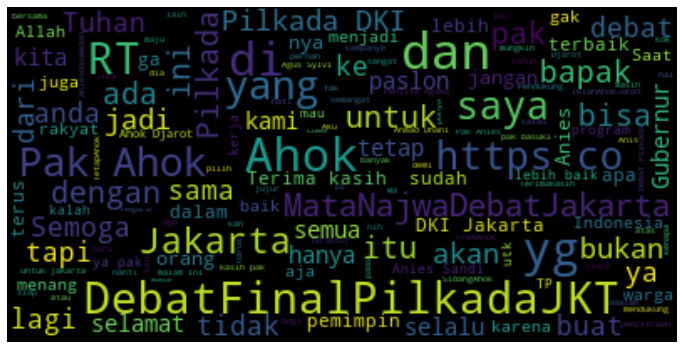

In [225]:
from wordcloud import WordCloud,STOPWORDS
word = df_tweet.Tweet[df_tweet['Label']=='Non_HS'].astype('string')
wordcloud = WordCloud(max_font_size=30, max_words=500, background_color="black").generate_from_text(' '.join(word))
print('Non Hate speech')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Hate speech


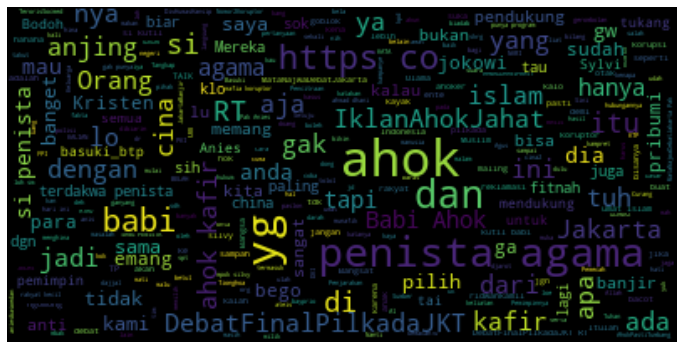

In [226]:
from wordcloud import WordCloud,STOPWORDS
word = df_tweet.Tweet[df_tweet['Label']=='HS'].astype('string')
wordcloud = WordCloud(max_font_size=30, max_words=500, background_color="black").generate_from_text(' '.join(word))
print('Hate speech')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [227]:
# Cleaning the tweets
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def preprocessing(a,b):
    data_tweetnew= []
    from nltk.corpus import stopwords
    for i in range(len(b)):
        teks = re.sub('[^a-zA-Z]', ' ', a[i])
        # Remove mentions
        teks = re.sub(r'@[A-Za-z0-9_]+', '', a[i])
        # Remove hashtags
        teks = re.sub(r'#', '', a[i])
        # Remove retweets:
        teks = re.sub(r'RT : ', '', a[i])
        # Remove urls
        teks = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', a[i])
        #Case Folding
        teks = teks.lower()
        #Tokinize
        teks = teks.split()
        #Stopword + Stemming
        stemmer = StemmerFactory().create_stemmer()        
        teks = [stemmer.stem(word) for word in teks if not word in set(stopwords.words('indonesian'))]
        teks = [word for word in teks if len (word) > 3]
        teks = ' '.join(teks)
        data_tweetnew.append(teks)
    return data_tweetnew

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
length_of_set = df_tweetnew['Label'].tolist()

In [229]:
data_set = preprocessing(df_tweetnew['Tweet'],length_of_set)

In [230]:
df_tweetnew['Prepro'] = pd.Series(data_set).values
df_tweetnew

,Label,Tweet,length,Prepro
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,spardaxyz fadli mendagri nonaktif ahok gubernu...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,108,baguscondromowo luka aksi rangka penjara ahok ...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,sylvi gurbernur keras perempuan bukti ibu2 fot...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,ahmad dhani puas debat pilkada jalan bekas ung...
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,lisdaulay28 waspada palsu kawal pilkada https ...
...,...,...,...,...
513,HS,Gimana dgn Sumber waras.. Trans Jakarta ko jok...,102,gimana sumber waras trans jakarta jokowi diem ...
514,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62,muka babi ahok serbet lantai basuki btp
515,HS,"Betul bang hancurkan merka bang, musnahkan chi...",107,bang hancur merka bang musnah china babi bumi ...
516,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139,sapa bilang ahok anti korupsi grombolannya ngo...


**MODEL SENTIMENT ANALYSIS**

In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn import metrics
mnb = MultinomialNB()

In [232]:
train=df_tweetnew['Prepro']
train_data = tfidfVectorizer.fit_transform(train)
train_data.shape

(518, 1922)

In [233]:
y = df_tweetnew['Label']
y = y.values
X = train_data
X = X.toarray()

In [236]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)    
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
x_train = Feature_scaler.fit_transform(np.array(x_train))
x_test = Feature_scaler.fit_transform(np.array(x_test))

mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print(" Naive Bayes Accuracy : ",metrics.accuracy_score(y_test, y_pred))

 Naive Bayes Accuracy :  0.9038461538461539


Dapat dilihat akurasi dari Naive Bayes diperoleh sebesar 90%. 